
# Abdelrahman Mostafa Sophy Mohamed
# The Sparks Foundation
# Data Science and Buisness Analytics intern
# Task_6
# Prediction using Decision Tree Algorithm

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [87]:
dic={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Species']=df['Species'].map(dic)

In [88]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [89]:
y=df['Species']
x=df.drop('Species',axis=1)

In [90]:
pd.DataFrame(y).value_counts()

Species
0          50
1          50
2          50
dtype: int64

In [91]:
df.drop('Id',axis=1,inplace=True)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=7)

In [93]:
model=DecisionTreeClassifier()

In [94]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

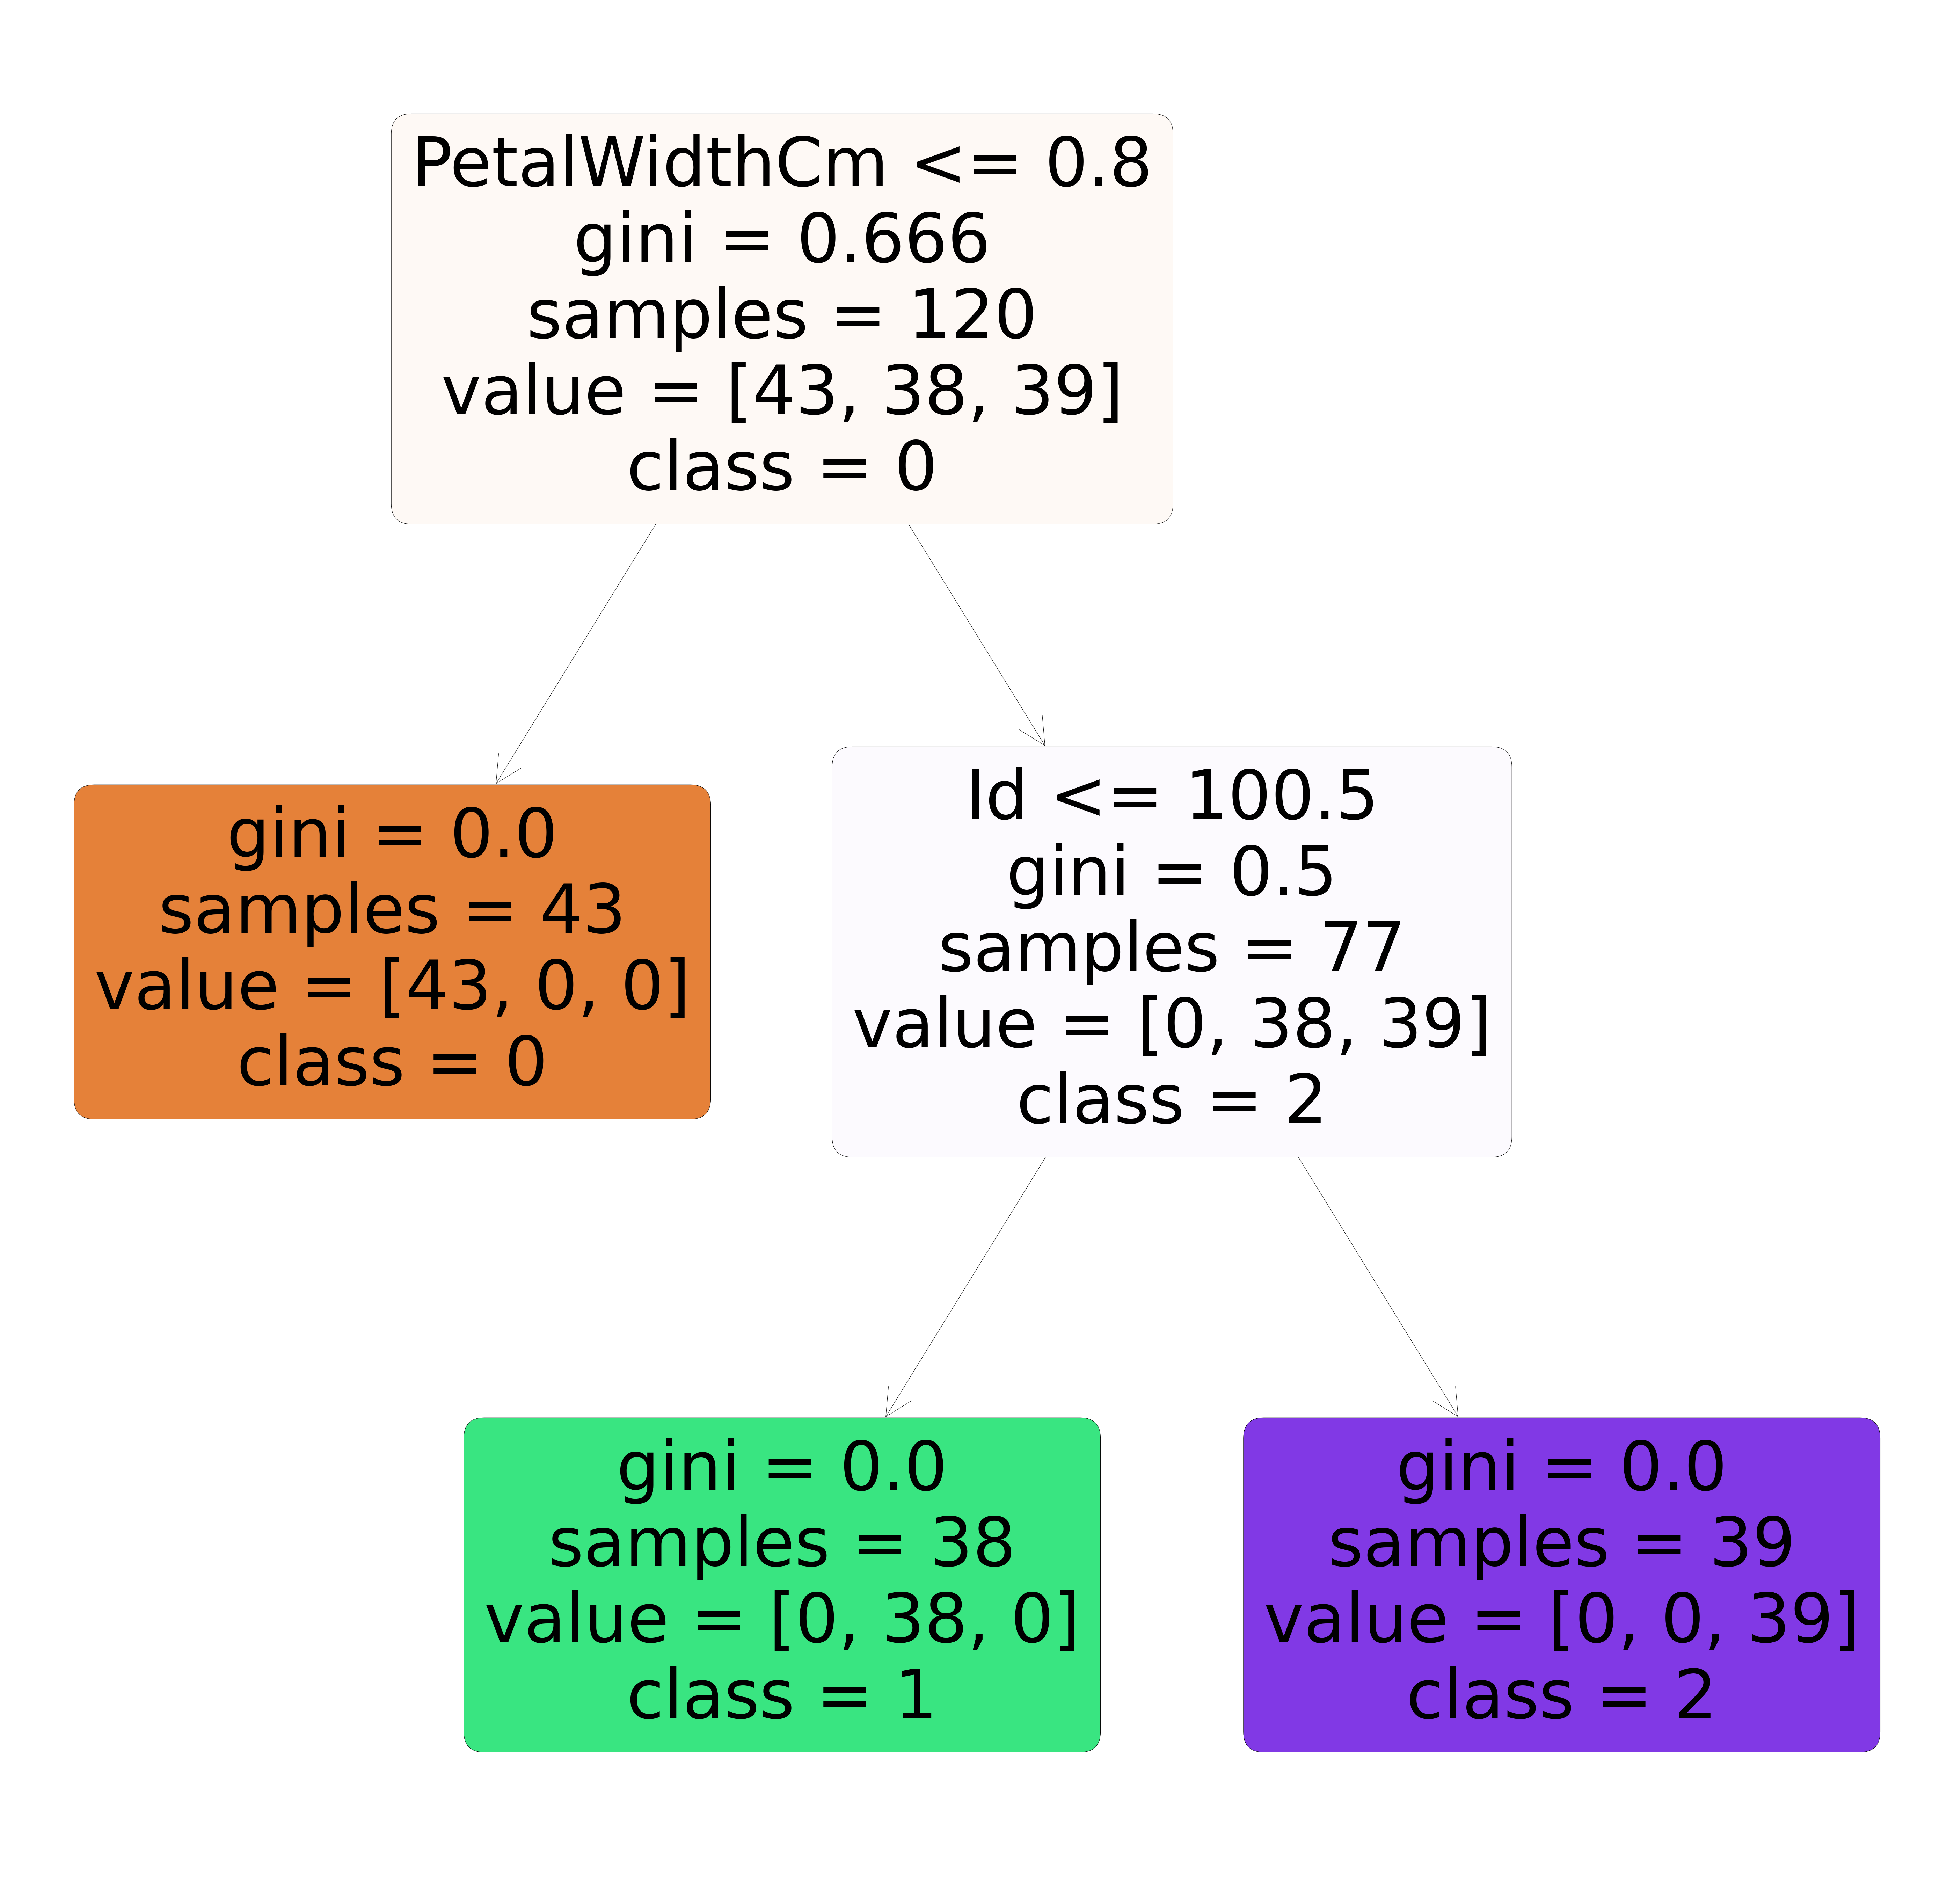

In [95]:
fig=plt.figure(figsize=(100,100))
_=plot_tree(model,feature_names=x.columns,class_names=y.unique().astype(str),filled=True,rounded=True)

In [96]:
print("Train Accuracy is " ,model.score(x_train,y_train))
print("Test Accuracy is " , model.score(x_test,y_test))

Train Accuracy is  1.0
Test Accuracy is  1.0


In [97]:
y_test_predict=model.predict(x_test)

In [98]:
cm = confusion_matrix(y_test,y_test_predict)

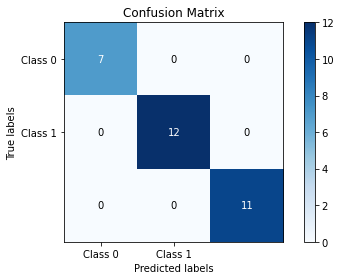

In [99]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()
plt.show()
